## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
from PIL import Image
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

In [ ]:
def create_image_dataframe():
    base_dir = "/content/drive/MyDrive/My Documents/IFS/Final year project/Project /data"

    # Categories based on folder names
    categories = ['Covid', 'Tuberculosis','Pneumonia', 'Normal']
    # List to store the data
    data = []

    # Loop through each category directory
    for category in categories:
        category_path = os.path.join(base_dir, category)
        if os.path.exists(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                if os.path.isfile(img_path):
                    data.append({'Image_Path': img_path, 'Category': category})

    # Create a DataFrame
    df = pd.DataFrame(data)
    return df

In [ ]:
df_images = create_image_dataframe()
df_images.head()

,Image_Path,Category
0,/content/drive/MyDrive/My Documents/IFS/Final ...,Covid
1,/content/drive/MyDrive/My Documents/IFS/Final ...,Covid
2,/content/drive/MyDrive/My Documents/IFS/Final ...,Covid
3,/content/drive/MyDrive/My Documents/IFS/Final ...,Covid
4,/content/drive/MyDrive/My Documents/IFS/Final ...,Covid


In [ ]:
df_images.to_csv('images_df.csv', index=False)

In [ ]:
df = pd.read_csv('images_df.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'images_df.csv'

## Data Distribution

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12264 entries, 0 to 12263
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  12264 non-null  object
 1   Category    12264 non-null  object
dtypes: object(2)
memory usage: 191.8+ KB


In [ ]:
df.value_counts('Category')

,count
Category,
Covid,3616
Normal,3524
Tuberculosis,3500
Pneumonia,1624


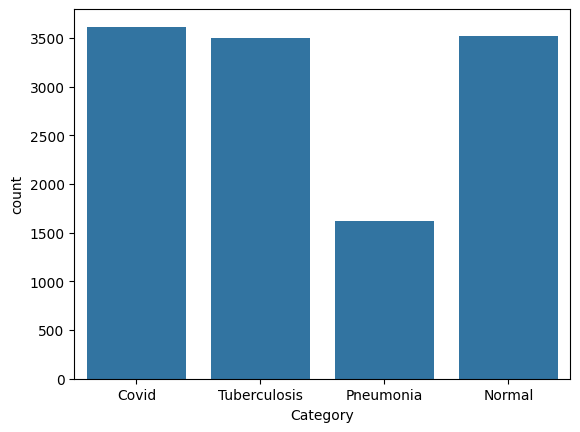

In [ ]:
sns.countplot(x='Category', data=df)
plt.show()

In [ ]:
# # Preprocess the images
# def preprocess_image(image_path):
#     image = Image.open(image_path).convert('L')  # Convert to grayscale
#     image = image.resize((64, 64))  # Resize to 64x64
#     return np.array(image)

# # Apply preprocessing to each image in the dataframe
# df['image'] = df['Image_Path'].apply(preprocess_image)

## Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

# Function to display images from 4 categories side by side
def display_random_images(df, categories, img_size=(128, 128)):
    """
    Display random images from each category side by side.

    Args:
        df: DataFrame containing 'path' and 'category' columns.
        categories: List of 4 categories to display.
        img_size: Tuple specifying the resize dimensions for each image.
    """
    # Create a subplot for 4 images
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Loop through each category and pick a random image
    for idx, category in enumerate(categories):
        # Get all image paths for the current category
        category_df = df[df['Category'] == category]

        # Randomly choose one image
        random_image_path = random.choice(category_df['Image_Path'].values)

        # Load and resize the image
        image = cv2.imread(random_image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        image = cv2.resize(image, img_size)  # Resize image

        # Display the image in the subplot
        axes[idx].imshow(image)
        axes[idx].set_title(category)
        axes[idx].axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a DataFrame `df` with 'path' and 'category' columns
# categories = ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']
# display_random_images(df, categories)


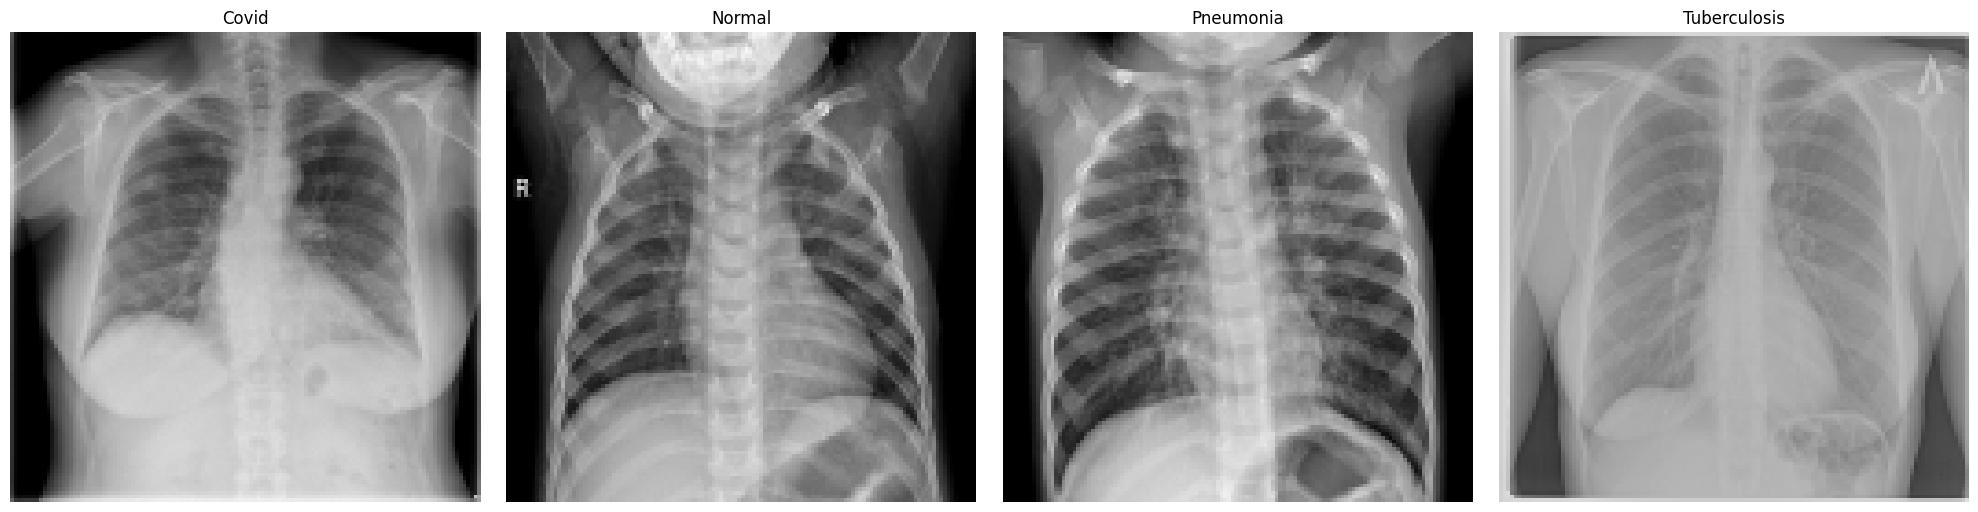

In [ ]:
categories = ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']
display_random_images(df, categories)

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Function to load and preprocess images by flattening the pixel values
def load_and_preprocess_image(image_path, image_size=(64, 64)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)  # Resize to a smaller size for simplicity
    image = image.flatten()  # Flatten the image into a 1D array (feature vector)
    return image

# Load images and labels from a dataset folder
def load_dataset(image_folder, image_size=(64, 64)):
    features = []
    labels = []
    for label_folder in os.listdir(image_folder):
        label_path = os.path.join(image_folder, label_folder)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                if image_path.endswith(('.png', '.jpg', '.jpeg')):
                    feature = load_and_preprocess_image(image_path, image_size)
                    features.append(feature)
                    labels.append(label_folder)
    return np.array(features), np.array(labels)

# Load the dataset
image_folder = '/content/drive/MyDrive/My Documents/IFS/Final year project/Project /data'
features, labels = load_dataset(image_folder)

In [ ]:
import pandas as pd

# Ensure you add the file name and extension
features_csv_path = '/content/drive/MyDrive/My Documents/IFS/Final year project/features.csv'
labels_csv_path = '/content/drive/MyDrive/My Documents/IFS/Final year project/labels.csv'

# Create DataFrame for features and labels
features_df = pd.DataFrame(features)
labels_df = pd.DataFrame(labels, columns=['label'])

# Save as CSV files
features_df.to_csv(features_csv_path, index=False)
labels_df.to_csv(labels_csv_path, index=False)

print(f"Features saved to {features_csv_path}")
print(f"Labels saved to {labels_csv_path}")


Features saved to /content/drive/MyDrive/My Documents/IFS/Final year project/features.csv
Labels saved to /content/drive/MyDrive/My Documents/IFS/Final year project/labels.csv


In [ ]:
features = np.array(pd.read_csv('/content/drive/MyDrive/My Documents/IFS/Final year project/features.csv'))
labels = pd.read_csv('/content/drive/MyDrive/My Documents/IFS/Final year project/labels.csv')['label']

In [ ]:
features.shape

In [ ]:
# Define a manual mapping from string labels to numerical labels
label_mapping = {
    'Covid': 0,
    'Normal': 1,
    'Pneumonia': 2,
    'Tuberculosis': 3
}

# Encode the labels manually
encoded_labels = [label_mapping[label] for label in labels]

## Data Splitting

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

## Model Training

In [ ]:
# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(labels)))
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.72%


In [ ]:
# Save the model to a file
model_path = "/content/drive/MyDrive/My Documents/IFS/Final year project/xgb_model.json"
xgb_classifier.save_model(model_path)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.75%


In [ ]:
import pickle

# Path where you want to save the model
model_save_path = '/content/drive/MyDrive/My Documents/IFS/Final year project/rf_model.pkl'

# Save the model using pickle
with open(model_save_path, 'wb') as file:
    pickle.dump(rf_classifier, file)

print(f"Random Forest model saved to {model_save_path}")


Random Forest model saved to /content/drive/MyDrive/My Documents/IFS/Final year project/rf_model.pkl


## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow as tf

# Function to predict and calculate metrics
def calculate_metrics(model, X_test, y_test_encoded, class_labels):
    # Predict the probabilities of each class
    pred_probs = model.predict_proba(X_test)
    predictions = np.argmax(pred_probs, axis=1)

    # Confusion matrix calculations
    conf_matrix = confusion_matrix(y_test_encoded, predictions)
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)

    # Per-class metrics
    PPV = TP / (TP + FP)  # Precision
    NPV = TN / (TN + FN)
    Sensitivity = TP / (TP + FNn)  # Recall
    Specificity = TN / (TN + FP)

    # Overall metrics
    accuracy = accuracy_score(y_test_encoded, predictions)
    f1 = f1_score(y_test_encoded, predictions, average='macro')
    precision = precision_score(y_test_encoded, predictions, average='macro')
    recall = recall_score(y_test_encoded, predictions, average='macro')

    # One-hot encode the true classes for AUC calculation
    y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(class_labels))
    auc = roc_auc_score(y_test_one_hot, pred_probs, multi_class='ovr')

    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'auc': auc,
        'specificity': np.mean(Specificity),
        'ppv': np.mean(PPV),
        'npv': np.mean(NPV),
        'sensitivity': np.mean(Sensitivity),
        'confusion_matrix': conf_matrix
    }


In [ ]:
# Assuming your class labels are ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']
class_labels = ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']

# Call the function to calculate metrics
metrics = calculate_metrics(rf_classifier, X_test, y_test, class_labels)

# Print or use the results
print(metrics)


{'accuracy': 0.9074602527517326, 'f1_score': 0.9094868972180126, 'precision': 0.9086585928349213, 'recall': 0.9117374804482479, 'auc': 0.9862179247041057, 'specificity': 0.9680734119572065, 'ppv': 0.9086585928349213, 'npv': 0.9681938800234614, 'sensitivity': 0.9117374804482479, 'confusion_matrix': array([[665,  33,   8,  21],
       [ 84, 603,  21,  16],
       [  6,  11, 291,   4],
       [ 11,  12,   0, 667]])}


In [ ]:
pd.DataFrame([metrics])

,accuracy,f1_score,precision,recall,auc,specificity,ppv,npv,sensitivity,confusion_matrix
0,0.90746,0.909487,0.908659,0.911737,0.986218,0.968073,0.908659,0.968194,0.911737,"[[665, 33, 8, 21], [84, 603, 21, 16], [6, 11, ..."


In [ ]:
# Assuming your class labels are ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']
class_labels = ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']

# Call the function to calculate metrics
metrics_x = calculate_metrics(xgb_classifier, X_test, y_test, class_labels)

# Print or use the results
pd.DataFrame([metrics_x])

,accuracy,f1_score,precision,recall,auc,specificity,ppv,npv,sensitivity,confusion_matrix
0,0.93722,0.93867,0.937002,0.940662,0.993896,0.978381,0.937002,0.978211,0.940662,"[[676, 34, 7, 10], [49, 652, 14, 9], [4, 9, 29..."


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to visualize the confusion matrix
def plot_confusion_matrix(model, X_test, y_test, class_labels):
    # Predict the classes
    predictions = model.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Plot the confusion matrix using seaborn's heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

    # Add labels and title
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

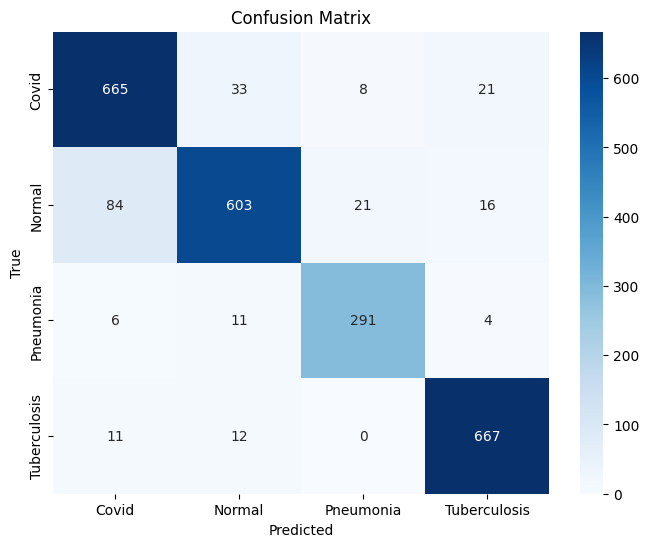

In [ ]:
# Call the function to plot the confusion matrix
plot_confusion_matrix(rf_classifier, X_test, y_test, class_labels)

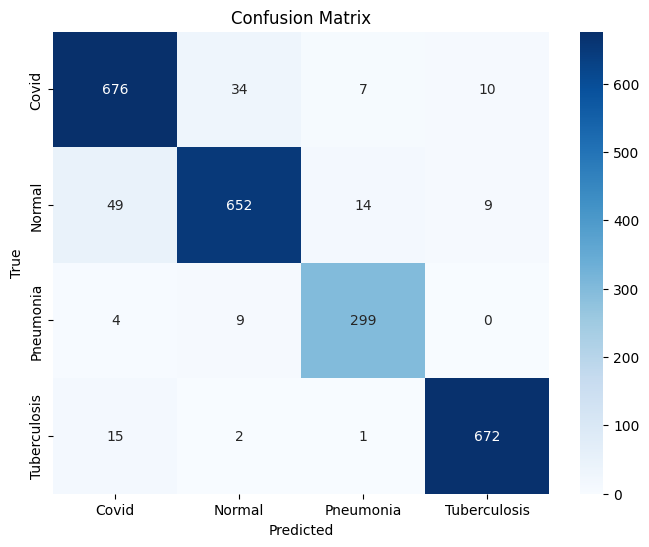

In [ ]:
# Call the function to plot the confusion matrix
plot_confusion_matrix(xgb_classifier, X_test, y_test, class_labels)

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the parameter grid
param_distributions = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_classifier,
                                   param_distributions=param_distributions,
                                   scoring='accuracy',
                                   n_iter=5,           # Number of iterations, you can adjust this
                                   cv=2,                # 3-fold cross-validation
                                   verbose=1)
                                   #n_jobs=-1)

# Fit the random search
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for Random Forest
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=10)],  # Number of trees in the forest
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# RandomizedSearchCV configuration
random_search = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_distributions,
                                   n_iter=5,  # Maximum of 10 random combinations
                                   scoring='accuracy',  # Evaluation metric
                                   cv=2,  # 2-fold cross-validation
                                   verbose=1,  # Print progress
                                   random_state=42,  # Set a seed for reproducibility
                                   n_jobs=-1)  # Use all available cores

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters: {'n_estimators': 188, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 70, 'bootstrap': False}
Best Cross-validation Accuracy: 0.9037813856672621
